In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import matplotlib.patches as Wedge
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

# Gênero

In [2]:
df = pd.read_csv('Results_clear.txt', sep='\t')
df = pd.DataFrame(df['6.6_gender_identity'].value_counts().reset_index())

# Keep the two highest values and sum the rest into 'Other'
top_two = df.iloc[:2]
other_sum = df.iloc[2:]['6.6_gender_identity'].sum()

# Create a new DataFrame with the top two values and 'Other'
df = top_two.append({'index': 'Outro', '6.6_gender_identity': other_sum}, ignore_index=True)

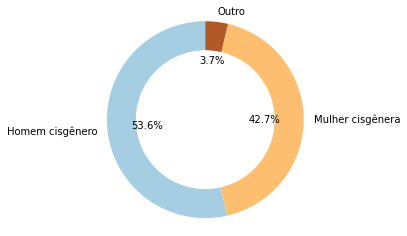

In [209]:
# Define a custom color palette
cmap = plt.get_cmap('Paired')
custom_colors = cmap(np.linspace(0, 1, len(df)))

# Define a custom autopct function to show percentages in parentheses
def autopct_format(pct):
    return f'({pct:.1f}%)'

# Create a donut chart
labels = df['index']
sizes = df['6.6_gender_identity']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, wedgeprops=dict(width=0.3), startangle=90, autopct='%1.1f%%', colors = custom_colors)

# Draw a circle in the center to make it a donut
center_circle = plt.Circle((0, 0), 0.70, color='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures the pie is drawn as a circle.
ax.axis('equal')

# Display the chart
# plt.savefig('/.../Figure_1b.pdf')
plt.show()

# Raça

In [210]:
df = pd.read_csv('Results_clear.txt', sep='\t')
df = pd.DataFrame(df['6.7_self_classification'].value_counts().reset_index())
df.columns = ['self_classification', 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / df['count'].sum()) * 100).round(1)

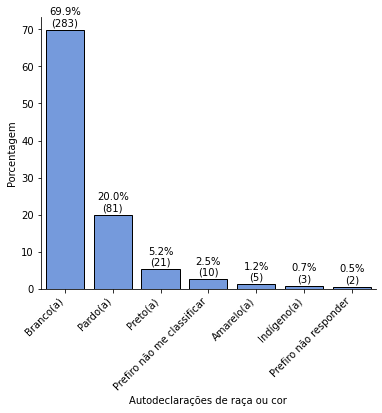

In [211]:
# Creating a bar plot
plt.figure(figsize=(6, 5))
ax = sns.barplot(data=df, x='self_classification', y='percentage', color='cornflowerblue', edgecolor='black')
plt.xlabel('Autodeclarações de raça ou cor')
plt.ylabel('Porcentagem')

# Customize plot appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adding percentage and count labels above each bar
for i, row in df.iterrows():
    percentage = row['percentage']
    count = row['count']
    ax.text(i, percentage + 4, f'{percentage}%', ha='center', color='black')      # Count label    
    ax.text(i, percentage + 1, f'({count})', ha='center', color='black')  # Percentage label

# plt.savefig('/.../Figure_1c.pdf')
plt.show()

# Idade por gênero

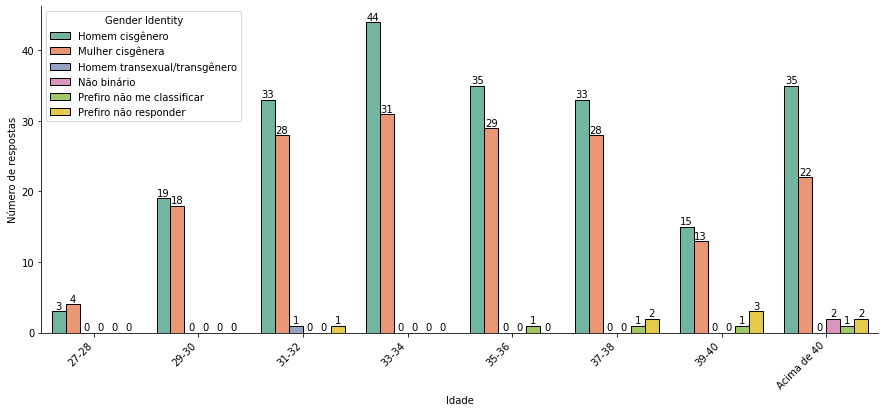

In [212]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')
df = df[['6.6_gender_identity','6.1_age_range']]
# Count occurrences of each age range and gender combination
grouped_data = df.groupby(['6.6_gender_identity', '6.1_age_range']).size().unstack(fill_value=0).reset_index()

# Melt the DataFrame to have columns for gender identity, age group, and counts
data_melted = grouped_data.melt(id_vars='6.6_gender_identity', 
                                var_name='Age_Group', 
                                value_name='Count')

# Define the specific order for gender identity
gender_order = [
    'Homem cisgênero', 'Mulher cisgênera', 'Homem transexual/transgênero', 
    'Não binário', 'Prefiro não me classificar', 'Prefiro não responder'
]

# Set the color palette
palette = sns.color_palette("Set2")

# Create the grouped bar chart with specified hue order
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=data_melted, 
                 x="Age_Group", 
                 y="Count", 
                 hue="6.6_gender_identity", 
                 palette=palette, 
                 hue_order=gender_order,  # Specify the order here
                 edgecolor='black')

plt.xlabel("Idade")
plt.ylabel("Número de respostas")
plt.xticks(rotation=45)
plt.legend(title="Gender Identity")

# Customize plot appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Manually add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), textcoords = 'offset points')

# plt.savefig('/.../Figure_1d.pdf')    
plt.show()

# Formação

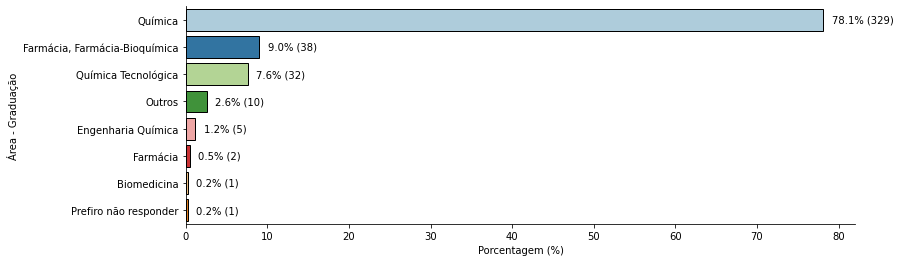

In [4]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')
df = df[['1.1_grad_area', '1.2_masters_area', '1.3_masters_sub_area']]

# Set a larger figure size for readability
plt.figure(figsize=(12, 4))

palette = sns.color_palette("Paired")

# Calculate counts and percentages for the "1.1_grad_area" column
value_counts = df['1.1_grad_area'].value_counts()
percentages = (value_counts / len(df)) * 100

# Convert to a DataFrame for plotting
plot_df = pd.DataFrame({
    'Curso - Graduação': value_counts.index,
    'Percentage': percentages,
})

# Plotting percentages
ax = sns.barplot(
    y='Curso - Graduação', 
    x='Percentage', 
    data=plot_df, 
    palette=palette, 
    edgecolor='black'
)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add percentages and counts at the end of each bar
for p in ax.patches:
    percentage = p.get_width()
    count = int((percentage / 100) * len(df))
    ax.text(p.get_width() + 1,  # Position text slightly to the right of the bar
            p.get_y() + p.get_height() / 2,  # Center the text vertically
            f'{percentage:.1f}% ({count})',  # Format as "percentage% (count)"
            ha="left", va="center")

# # Set the X-axis limits to 0% and 100%
# ax.set_xlim(75, 80)

# # Update x-axis to show percentage labels
# ax.set_xticks(range(75, 86, 5))  # Set tick marks at every 10%
# ax.set_xticklabels([f'{tick}%' for tick in range(0, 86, 5)])  # Format tick labels as percentages

# Update axis labels
plt.xlabel("Porcentagem (%)")
plt.ylabel("Área - Graduação")

# Display the plot
# plt.savefig('/.../Figure_1e.pdf')
plt.show()

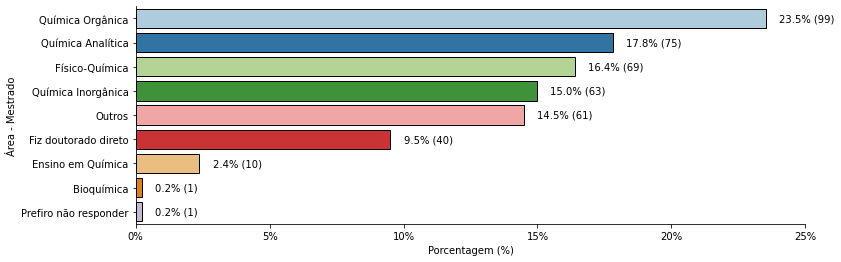

In [2]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')
df = df[['1.1_grad_area', '1.2_masters_area', '1.3_masters_sub_area']]

# Set a larger figure size for readability
plt.figure(figsize=(12, 4))

palette = sns.color_palette("Paired")

# Calculate counts and percentages for the "1.1_grad_area" column
value_counts = df['1.2_masters_area'].value_counts()
percentages = (value_counts / len(df)) * 100

# Convert to a DataFrame for plotting
plot_df = pd.DataFrame({
    'Curso - Graduação': value_counts.index,
    'Percentage': percentages,
})

# Plotting percentages
ax = sns.barplot(
    y='Curso - Graduação', 
    x='Percentage', 
    data=plot_df, 
    palette=palette, 
    edgecolor='black'
)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add percentages and counts at the end of each bar
for p in ax.patches:
    percentage = p.get_width()
    count = int((percentage / 100) * len(df))
    ax.text(p.get_width() + 0.5,  # Position text slightly to the right of the bar
            p.get_y() + p.get_height() / 2,  # Center the text vertically
            f'{percentage:.1f}% ({count})',  # Format as "percentage% (count)"
            ha="left", va="center")

# Set the X-axis limits to 0% and 100%
ax.set_xlim(0, 25)

# Update x-axis to show percentage labels
ax.set_xticks(range(0, 26, 5))  # Set tick marks at every 10%
ax.set_xticklabels([f'{tick}%' for tick in range(0, 26, 5)])  # Format tick labels as percentages

# Update axis labels
plt.xlabel("Porcentagem (%)")
plt.ylabel("Área - Mestrado")

# Display the plot
# plt.savefig('/.../Figure_1e.pdf')
plt.show()

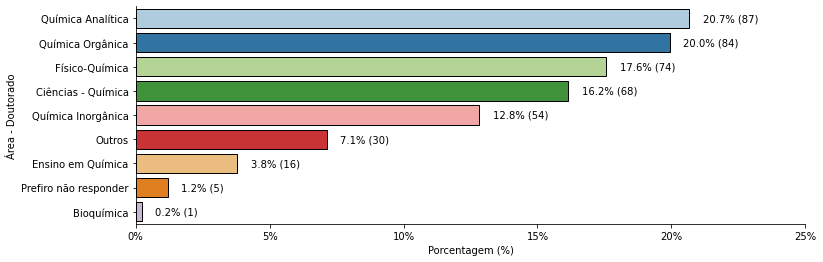

In [5]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')
df = df[['1.1_grad_area', '1.2_masters_area', '1.3_masters_sub_area']]

# Set a larger figure size for readability
plt.figure(figsize=(12, 4))

palette = sns.color_palette("Paired")

# Calculate counts and percentages for the "1.1_grad_area" column
value_counts = df['1.3_masters_sub_area'].value_counts()
percentages = (value_counts / len(df)) * 100

# Convert to a DataFrame for plotting
plot_df = pd.DataFrame({
    'Curso - Graduação': value_counts.index,
    'Percentage': percentages,
})

# Plotting percentages
ax = sns.barplot(
    y='Curso - Graduação', 
    x='Percentage', 
    data=plot_df, 
    palette=palette, 
    edgecolor='black'
)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add percentages and counts at the end of each bar
for p in ax.patches:
    percentage = p.get_width()
    count = int((percentage / 100) * len(df))
    ax.text(p.get_width() + 0.5,  # Position text slightly to the right of the bar
            p.get_y() + p.get_height() / 2,  # Center the text vertically
            f'{percentage:.1f}% ({count})',  # Format as "percentage% (count)"
            ha="left", va="center")

# Set the X-axis limits to 0% and 100%
ax.set_xlim(0, 25)

# Update x-axis to show percentage labels
ax.set_xticks(range(0, 26, 5))  # Set tick marks at every 10%
ax.set_xticklabels([f'{tick}%' for tick in range(0, 26, 5)])  # Format tick labels as percentages

# Update axis labels
plt.xlabel("Porcentagem (%)")
plt.ylabel("Área - Doutorado")

# Display the plot
# plt.savefig('/.../Figure_1g.pdf')
plt.show()

# Mapa residência

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely
from matplotlib import style

df = pd.read_csv('Results_clear.txt', sep='\t')

code = '1.13_residency'

dados = df[code].value_counts().reset_index(name='Total')
dados.rename(columns={'index': code}, inplace=True)
dados = dados[dados[code].str.endswith(')')]

dados[code] = dados[code].apply(lambda x: x.split('(')[1][:2])
dados['Percentual'] = dados['Total'] / dados['Total'].sum() * 100
dados = dados.drop(dados[dados['Total'] == 0].index)

#import map
zipfile='/Users/helenarusso/Downloads/geoBoundaries-BRA-ADM1-all.zip'
custom=gpd.read_file(zipfile)

custom.shapeISO = custom.shapeISO.apply(lambda x: x.replace('BR-', ''))
custom=custom.merge(dados,left_on='shapeISO',right_on=code,how='outer')

# para adicionar anotações no mapa, se quiser
custom['coords'] = custom['geometry'].apply(lambda x: x.representative_point().coords[:])
custom['coords'] = [coords[0] for coords in custom['coords']]

base=custom.boundary.plot(figsize=(12,6),edgecolor='grey', linewidth=0.5)
custom.plot(ax=base,column='Percentual', legend=True,legend_kwds={
'location': "right", "shrink":.5},missing_kwds={'color': 'lightgrey'},cmap='OrRd')

for idx, row in custom.iterrows():
    plt.annotate(text=round(row['Percentual'], 1), xy=row['coords'],
                 horizontalalignment='center', color='black')

base.set_axis_off()

# plt.savefig(f'{figure_path}{code}_mapa.svg')
plt.tight_layout()
# plt.savefig(f'{code}_mapa_anotado.svg')


# Mapa nascimento

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely
from matplotlib import style

df = pd.read_csv('Results_clear.txt', sep='\t')

code = '6.5_state_born'

dados = df[code].value_counts().reset_index(name='Total')
dados.rename(columns={'index': code}, inplace=True)
dados = dados[dados[code].str.endswith(')')]

dados[code] = dados[code].apply(lambda x: x.split('(')[1][:2])
dados['Percentual'] = dados['Total'] / dados['Total'].sum() * 100
dados = dados.drop(dados[dados['Total'] == 0].index)

#import map
zipfile='/Users/helenarusso/Downloads/geoBoundaries-BRA-ADM1-all.zip'
custom=gpd.read_file(zipfile)

custom.shapeISO = custom.shapeISO.apply(lambda x: x.replace('BR-', ''))
custom=custom.merge(dados,left_on='shapeISO',right_on=code,how='outer')

# para adicionar anotações no mapa, se quiser
custom['coords'] = custom['geometry'].apply(lambda x: x.representative_point().coords[:])
custom['coords'] = [coords[0] for coords in custom['coords']]

base=custom.boundary.plot(figsize=(12,6),edgecolor='grey', linewidth=0.5)
custom.plot(ax=base,column='Percentual', legend=True,legend_kwds={
'location': "right", "shrink":.5},missing_kwds={'color': 'lightgrey'},cmap='OrRd')

for idx, row in custom.iterrows():
    plt.annotate(text=round(row['Percentual'], 1), xy=row['coords'],
                 horizontalalignment='center', color='black')

base.set_axis_off()

# plt.savefig(f'{figure_path}{code}_mapa.svg')
plt.tight_layout()
# plt.savefig(f'{code}_mapa_anotado.svg')


# Mapa doutorado

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely
from matplotlib import style

df = pd.read_csv('Results_clear.txt', sep='\t')

code = '1.6_state_doc'

dados = df[code].value_counts().reset_index(name='Total')
dados.rename(columns={'index': code}, inplace=True)
dados = dados[dados[code].str.endswith(')')]

dados[code] = dados[code].apply(lambda x: x.split('(')[1][:2])
dados['Percentual'] = dados['Total'] / dados['Total'].sum() * 100
dados = dados.drop(dados[dados['Total'] == 0].index)

#import map
zipfile='/Users/helenarusso/Downloads/geoBoundaries-BRA-ADM1-all.zip'
custom=gpd.read_file(zipfile)

custom.shapeISO = custom.shapeISO.apply(lambda x: x.replace('BR-', ''))
custom=custom.merge(dados,left_on='shapeISO',right_on=code,how='outer')

# para adicionar anotações no mapa, se quiser
custom['coords'] = custom['geometry'].apply(lambda x: x.representative_point().coords[:])
custom['coords'] = [coords[0] for coords in custom['coords']]

base=custom.boundary.plot(figsize=(12,6),edgecolor='grey', linewidth=0.5)
custom.plot(ax=base,column='Percentual', legend=True,legend_kwds={
'location': "right", "shrink":.5},missing_kwds={'color': 'lightgrey'},cmap='OrRd')

for idx, row in custom.iterrows():
    plt.annotate(text=round(row['Percentual'], 1), xy=row['coords'],
                 horizontalalignment='center', color='black')

base.set_axis_off()

# plt.savefig(f'{figure_path}{code}_mapa.svg')
plt.tight_layout()
# plt.savefig(f'{code}_mapa_anotado.svg')
